In [117]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve

In [95]:
# loading the dataset into pandas
dataset = pd.read_csv("H:/UCD/4 Fourth Semester/Data/Personal Loan.csv")

# Display first five records of the dataset
dataset.head()

,ID,Amt Requested,Amt Funded,Length,Monthly Pmt,Pmts to Date,State,Income,Open LoC,Total LoC,...,FICO,Home,Utilization,Rate,D/I,Standing,Balance,Delinquent,Months,Train/Valid/Test
0,1,3300,3300.0,36 months,111.29,1110.10,KY,1700.00,6,15,...,670.0,Mortgage,8.70%,13.06%,6.59%,Currently paying,624,1,6.0,Training
1,2,4800,4800.0,36 months,157.13,1095.99,CO,1650.00,3,12,...,733.0,Rent,0.00%,10.99%,23.70%,Currently paying,0,0,NaN,Training
2,3,8700,8700.0,36 months,272.15,5432.20,FL,5416.67,11,20,...,733.0,Own,31.10%,7.88%,13.38%,Currently paying,8568,0,NaN,Test
3,4,12300,1325.0,36 months,417.25,13535.28,CA,2667.00,15,22,...,698.0,Rent,29.10%,13.47%,22.08%,Paid,10543,0,NaN,Training
4,5,11200,11200.0,36 months,343.89,1030.65,NY,4333.33,13,26,...,733.0,Rent,57.00%,6.62%,11.38%,Currently paying,21379,0,NaN,Validation


In [96]:
# Exploratory Data Analysis (EDA)
# Number of missing values in each column
missing_values = dataset.isnull().sum()
print(missing_values)

ID                      0
Amt Requested           0
Amt Funded              0
Length                  0
Monthly Pmt             0
Pmts to Date            0
State                   0
Income                  0
Open LoC                0
Total LoC               0
Employ                840
Purpose                 0
FICO                    0
Home                    0
Utilization            42
Rate                    0
D/I                     0
Standing                0
Balance                 0
Delinquent              0
Months              18981
Train/Valid/Test        0
dtype: int64


In [97]:
# "na_filter = False" is to read 'n/a' values as is but not as NAN
dataset = pd.read_csv("H:/UCD/4 Fourth Semester/Data/Personal Loan.csv", na_filter = False)

# Rename the column 
dataset = dataset.rename(index=str, columns={"D/I":"DI"})

In [98]:
# convert categorical values into numeric
mapping_employ = {
   "Employ": {
        "10+": 10,
        "9": 9,
        "8": 8,
        "7": 7,
        "6": 6,
        "5": 5,
        "4": 4,
        "3": 3,
        "2": 2,
        "1": 1,
        "< 1": 0,
        "n/a": 0
    },
    "Length": {
        "36 months": 36,
        "60 months": 60
    }
}

# Check the data type of each variable in the dataset
dataset = dataset.replace(mapping_employ)

In [99]:
#FICO_low = dataset.FICO.str.split('-',1).str[0]
#FICO_low = pd.DataFrame(FICO_low)
#FICO_low.columns = ["FICO_low"]

#FICO_high = dataset.FICO.str.split('-',2).str[1]
#FICO_high = pd.DataFrame(FICO_high)
#FICO_high.columns = ["FICO_high"]

In [100]:
# Amt funded, monthly pmt and pmts to date is not included in the data set as it does not represent
# the prediction for future interest rate and "ID" which is a row identifier. So dropping the columns
dataset = dataset.drop(['ID','Amt Funded', 'Monthly Pmt', 'Pmts to Date', 'Train/Valid/Test'], axis = 1)

In [101]:
# Inconsistent data point in the "state" variable is corrected from Ill, Tex, WISC to IL,TX,WI.
New_State = dataset['State'].replace('Ill','IL').replace('Tex','TX').replace('WISC', 'WI')
New_State = pd.DataFrame(New_State)
New_State.columns = ['State']

# Drop State column from the data set and add new new_state column
dataset = dataset.drop(['State'], axis = 1)
#dataset = pd.concat([dataset, New_State, FICO_low, FICO_high], axis = 1)
dataset = pd.concat([dataset, New_State], axis = 1)

#dataset['FICO_high'] = dataset['FICO_high'].replace('[^0-9]<', '', regex=True)

In [102]:
#Remove % symbol from the interest rate & revolving utilization 
dataset.Utilization = dataset.Utilization.str.split('%',1).str[0] 
dataset.Rate = dataset.Rate.str.split('%',1).str[0]
dataset.DI = dataset.DI.str.split('%',1).str[0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029DCD22BBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029DD1275780>]], dtype=object)

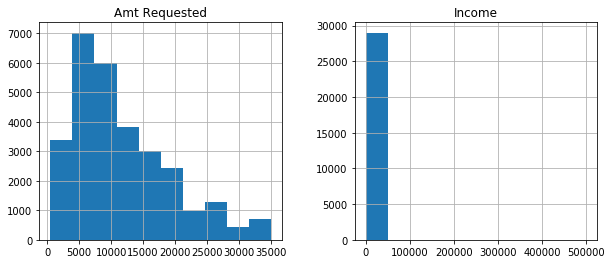

In [103]:
dataset[['Amt Requested','Income']].hist(figsize=(10,4))

In [104]:
# Check the data type of each variable in the dataset
dataset.dtypes

Amt Requested      int64
Length             int64
Income           float64
Open LoC           int64
Total LoC          int64
Employ             int64
Purpose           object
FICO             float64
Home              object
Utilization       object
Rate              object
DI                object
Standing          object
Balance            int64
Delinquent         int64
Months            object
State             object
dtype: object

In [105]:
# Convert variable which are categorical into numerical using label encoder as scikit learn package cannot split
# the categorical variables
label_encoder = LabelEncoder()

dataset.Purpose = label_encoder.fit_transform(dataset.Purpose.values)
dataset.FICO = label_encoder.fit_transform(dataset.FICO.values)
dataset.Home = label_encoder.fit_transform(dataset.Home.values)
dataset.Utilization = label_encoder.fit_transform(dataset.Utilization.values)
dataset.Rate = label_encoder.fit_transform(dataset.Rate.values)
dataset.DI = label_encoder.fit_transform(dataset.DI.values)
dataset.Standing = label_encoder.fit_transform(dataset.Standing.values)
dataset.Months = label_encoder.fit_transform(dataset.Months.values)
dataset.State = label_encoder.fit_transform(dataset.State.values)

dataset.head(3)

,Amt Requested,Length,Income,Open LoC,Total LoC,Employ,Purpose,FICO,Home,Utilization,Rate,DI,Standing,Balance,Delinquent,Months,State
0,3300,36,1700.00,6,15,6,10,0,1,834,85,2491,0,624,1,60,17
1,4800,36,1650.00,3,12,0,8,2,4,1,26,1667,0,0,0,0,5
2,8700,36,5416.67,11,20,3,1,2,3,274,346,535,0,8568,0,0,9


In [106]:
'''
train = dataset[dataset['Train/Valid/Test'] == 'Training']
print(len(train))
valid = dataset[dataset['Train/Valid/Test'] == 'Validation']
print(len(valid))
test = dataset[dataset['Train/Valid/Test'] == 'Test']
print(len(test))
'''

"\ntrain = dataset[dataset['Train/Valid/Test'] == 'Training']\nprint(len(train))\nvalid = dataset[dataset['Train/Valid/Test'] == 'Validation']\nprint(len(valid))\ntest = dataset[dataset['Train/Valid/Test'] == 'Test']\nprint(len(test))\n"

In [107]:
# Ssplit the data into response and predictor variables
y = dataset.Rate.values
del dataset['Rate'] 
X = dataset.values

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [108]:
# Fit and Predict the model
gbrt = GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test)

In [109]:
# R-squared value for train/test
print("R-squared for Train: %.2f" %gbrt.score(X_train, y_train))
print("R-squared for Test: %.2f" %gbrt.score(X_test, y_test))

R-squared for Train: 0.42
R-squared for Test: 0.42


In [ ]:
# Optimize the model by uning the parameter
param_grid={'n_estimators':[100],#,500,1000], 
            'learning_rate': [0.1,0.05,0.02],# 0.01], 
            'max_depth':[4,6], 
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1] } 
n_jobs=4

classifier = GridSearchCV(estimator=GradientBoostingRegressor(), cv=10, param_grid=param_grid, n_jobs=n_jobs)

classifier.fit(X_train, y_train)
print(classifier.best_estimator_)

In [112]:
# Best parameters for the model
best_est=classifier.best_estimator_
print("n_estimators: %d"%best_est.n_estimators)
print("n_estimators: %d"%best_est.max_depth)
print("n_estimators: %d"%best_est.learning_rate)
print("n_estimators: %d"%best_est.min_samples_leaf)
print("n_estimators: %d"%best_est.max_features)

n_estimators: 100
n_estimators: 6
n_estimators: 0
n_estimators: 17
n_estimators: 1


In [119]:
# Training and Validation R-Squared after optimization
print("Train R-squared: %.2f" %best_est.score(X_train,y_train))
print("R-squared for Test: %.2f" %best_est.score(X_test, y_test))

Train R-squared: 0.51
R-squared for Test: 0.53


In [120]:
# Plotting the learning curve using the in built method in scikit-learn package
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


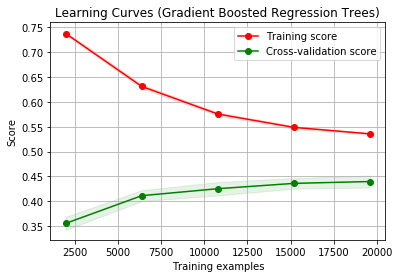

In [121]:
# From the learning curve, we can see that training R-Squared is maximum when the training examples are less and it decreases 
# when the examples increase. On the contrary Cross-validation R-squared increases when the training examples increases.
title = "Learning Curves (Gradient Boosted Regression Trees)"
estimator = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth, learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf, max_features=best_est.max_features) 
plot_learning_curve(estimator, title, X_train, y_train, cv=10, n_jobs=n_jobs)
plt.show()
